In [9]:
import os

import joblib
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1. / 255)

valid_datagen = ImageDataGenerator(rescale=1. / 255)

In [11]:
SAVE_DIR = "/Users/Bilal/PycharmProjects/LearningAI/models/assignment_7/task_3"
MODEL_PATH = f"{SAVE_DIR}/food_model.keras"
HISTORY_PATH = f"{SAVE_DIR}/history.pkl"

In [12]:
train_dir = "/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_7/task_3/10_food_classes_all_data/train"
test_dir = "/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_7/task_3/10_food_classes_all_data/test"

train_data = train_datagen.flow_from_directory(
    train_dir,
    color_mode="rgb",
    batch_size=32,
    target_size=(128, 128),
    class_mode="categorical"
)

test_data = valid_datagen.flow_from_directory(
    test_dir,
    color_mode="rgb",
    batch_size=32,
    target_size=(128, 128),
    class_mode="categorical"
)



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [13]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomFlip(mode='horizontal'),

])


In [14]:
model = tf.keras.Sequential([

    tf.keras.layers.Input(shape=(128, 128, 3)),
    data_augmentation,

    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.Conv2D(16, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(10, activation="softmax")
])


In [15]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

Loading Already Present Model


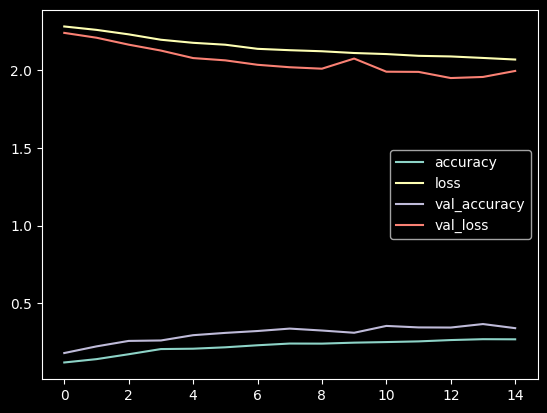

In [16]:


if os.path.exists(MODEL_PATH) and os.path.exists(HISTORY_PATH):
    print("Loading Already Present Model")
    model = tf.keras.models.load_model(MODEL_PATH)
    history = joblib.load(HISTORY_PATH)
    #evaulation
    pd.DataFrame(history).plot()

else:
    print("Making a new Model")

    history = model.fit(train_data, epochs=15, validation_data=test_data)
    model.save(MODEL_PATH)
    #savng history
    joblib.dump(history.history, HISTORY_PATH)

    #evaluation
    pd.DataFrame(history.history).plot()